In [271]:
import pandas as pd
import numpy as np

# Data Loading and Merging #

In [272]:
#Load the database

df = pd.read_csv('randomization.csv')
df.head()

,subject,arm
0,359,PLACEBO
1,241,PLACEBO
2,409,PLACEBO
3,271,ACTIVE
4,442,ACTIVE


In [273]:
dfsubject = pd.read_csv('subject.csv')
dfsubject.head()

,subject,country,eye.colour,tissue.use,previous.year,mucus.viscosity
0,359,A,BLUE,MEDIUM,2,1.304348
1,241,A,BLUE,HIGH,2,0.869565
2,409,A,BLUE,MEDIUM,2,0.434783
3,271,A,BLUE,HIGH,3,0.869565
4,442,A,BLUE,HIGH,2,1.304348


In [274]:
dfefficacy = pd.read_csv('efficacy.csv')
dfefficacy.head()

,subject,nosebleeds,duration
0,359,4,365
1,241,0,365
2,409,1,365
3,271,0,285
4,442,0,365


In [275]:
df = pd.merge(df, dfsubject, on='subject')
df.head()

,subject,arm,country,eye.colour,tissue.use,previous.year,mucus.viscosity
0,359,PLACEBO,A,BLUE,MEDIUM,2,1.304348
1,241,PLACEBO,A,BLUE,HIGH,2,0.869565
2,409,PLACEBO,A,BLUE,MEDIUM,2,0.434783
3,271,ACTIVE,A,BLUE,HIGH,3,0.869565
4,442,ACTIVE,A,BLUE,HIGH,2,1.304348


In [276]:
df = pd.merge(df, dfefficacy, on='subject')
df.head()

,subject,arm,country,eye.colour,tissue.use,previous.year,mucus.viscosity,nosebleeds,duration
0,359,PLACEBO,A,BLUE,MEDIUM,2,1.304348,4,365
1,241,PLACEBO,A,BLUE,HIGH,2,0.869565,0,365
2,409,PLACEBO,A,BLUE,MEDIUM,2,0.434783,1,365
3,271,ACTIVE,A,BLUE,HIGH,3,0.869565,0,285
4,442,ACTIVE,A,BLUE,HIGH,2,1.304348,0,365


In [277]:
#Data overview (quantitative)
df.describe()

,subject,previous.year,mucus.viscosity,nosebleeds,duration
count,444.000000,444.000000,443.000000,444.000000,444.000000
mean,307.583333,2.274775,1.356150,0.450450,342.567568
std,174.495376,0.578933,1.205410,0.888743,69.777120
min,4.000000,2.000000,0.000000,0.000000,10.000000
25%,157.750000,2.000000,0.613043,0.000000,365.000000
50%,306.500000,2.000000,1.000000,0.000000,365.000000
75%,455.250000,2.000000,1.695652,1.000000,365.000000
max,605.000000,5.000000,7.317391,5.000000,365.000000


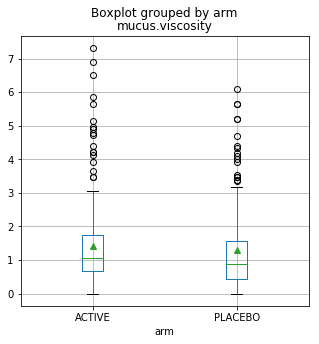

In [278]:
# Checking inter sample variabilities
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5,  5))
df.boxplot(['mucus.viscosity'], 'arm', ax, showmeans=True)

In [279]:
dfactive = df[df.arm == 'ACTIVE']
dfactive.head()

,subject,arm,country,eye.colour,tissue.use,previous.year,mucus.viscosity,nosebleeds,duration
3,271,ACTIVE,A,BLUE,HIGH,3,0.869565,0,285
4,442,ACTIVE,A,BLUE,HIGH,2,1.304348,0,365
7,564,ACTIVE,A,NaN,MEDIUM,3,1.304348,3,364
9,369,ACTIVE,A,BLUE,MEDIUM,2,0.434783,0,329
10,509,ACTIVE,A,BLACK,HIGH,2,0.869565,0,365


# Dividing data into Active and Placebo Dataframes and Visualisation #

In [280]:
# Normalizing number of nose bleedings for measurment duration for active cases (per day rate)

dfactive['nosebleed_rate_last_year'] = dfactive.apply(lambda row: (row['previous.year']/365), axis=1)
dfactive['nosebleed_rate'] = dfactive.apply(lambda row: (row['nosebleeds']/row['duration']), axis=1)
dfactive.drop(['previous.year', 'nosebleeds', 'duration'], axis=1, inplace=True)
dfactive.head()

C:\Users\roohi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\roohi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\roohi\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vi

,subject,arm,country,eye.colour,tissue.use,mucus.viscosity,nosebleed_rate_last_year,nosebleed_rate
3,271,ACTIVE,A,BLUE,HIGH,0.869565,0.008219,0.000000
4,442,ACTIVE,A,BLUE,HIGH,1.304348,0.005479,0.000000
7,564,ACTIVE,A,NaN,MEDIUM,1.304348,0.008219,0.008242
9,369,ACTIVE,A,BLUE,MEDIUM,0.434783,0.005479,0.000000
10,509,ACTIVE,A,BLACK,HIGH,0.869565,0.005479,0.000000


In [281]:
dfactive.describe()

,subject,mucus.viscosity,nosebleed_rate_last_year,nosebleed_rate
count,223.000000,222.000000,223.000000,223.000000
mean,304.215247,1.423328,0.006339,0.001093
std,172.786773,1.266658,0.001705,0.002374
min,4.000000,0.000000,0.005479,0.000000
25%,160.000000,0.663043,0.005479,0.000000
50%,304.000000,1.050000,0.005479,0.000000
75%,449.000000,1.739130,0.005479,0.000000
max,604.000000,7.317391,0.013699,0.013699


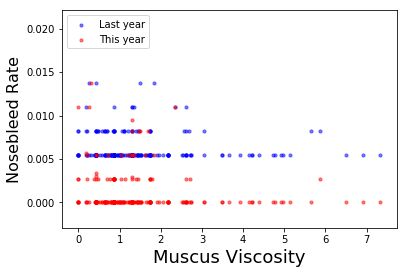

In [282]:
# Visualizing last year vs this year nose bleeding rate for Active cases
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(dfactive['mucus.viscosity'], dfactive['nosebleed_rate_last_year'], s=10, c='b', label='Last year', alpha=0.5)
ax1.scatter(dfactive['mucus.viscosity'], dfactive['nosebleed_rate'], s=10, c='r', label='This year', alpha=0.5)
plt.legend(loc='upper left')
plt.xlabel('Muscus Viscosity', fontsize=18)
plt.ylabel('Nosebleed Rate', fontsize=16)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002106439DA58>,
      dtype=object)

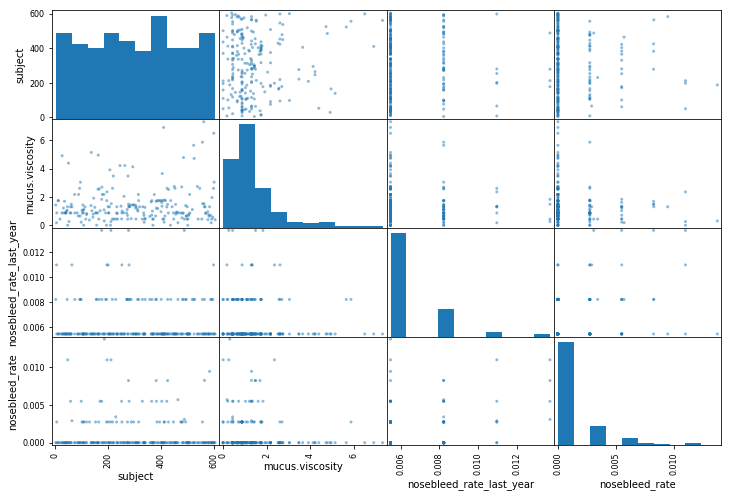

In [283]:
# Active dataframe scatter matrix to check out distributions

from pandas.plotting import scatter_matrix
scatter_matrix(dfactive, figsize=(12,8))

In [284]:
# Normalizing number of nose bleedings for measurment duration for placebo cases (per day rate)

dfplacebo= df[df.arm == 'PLACEBO']
dfplacebo['nosebleed_rate_last_year'] = dfplacebo.apply(lambda row: (row['previous.year']/365), axis=1)
dfplacebo['nosebleed_rate'] = dfplacebo.apply(lambda row: (row['nosebleeds']/row['duration']), axis=1)
dfplacebo.drop(['previous.year', 'nosebleeds', 'duration'], axis=1, inplace=True)
dfplacebo.describe()

C:\Users\roohi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\roohi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,subject,mucus.viscosity,nosebleed_rate_last_year,nosebleed_rate
count,221.0000,221.000000,221.000000,221.000000
mean,310.9819,1.288668,0.006124,0.001558
std,176.5296,1.139469,0.001452,0.002958
min,5.0000,0.000000,0.005479,0.000000
25%,156.0000,0.447826,0.005479,0.000000
50%,314.0000,0.869565,0.005479,0.000000
75%,466.0000,1.573913,0.005479,0.002740
max,605.0000,6.086957,0.013699,0.020408


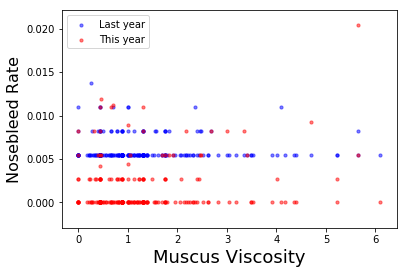

In [285]:
# Visualizing last year vs this year nose bleeding rate for Placebo cases

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(dfplacebo['mucus.viscosity'], dfplacebo['nosebleed_rate_last_year'], s=10, c='b', label='Last year', alpha=0.5)
ax1.scatter(dfplacebo['mucus.viscosity'], dfplacebo['nosebleed_rate'], s=10, c='r', label='This year', alpha=0.5)
plt.legend(loc='upper left')
plt.xlabel('Muscus Viscosity', fontsize=18)
plt.ylabel('Nosebleed Rate', fontsize=16)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000210649479E8>,
      dtype=object)

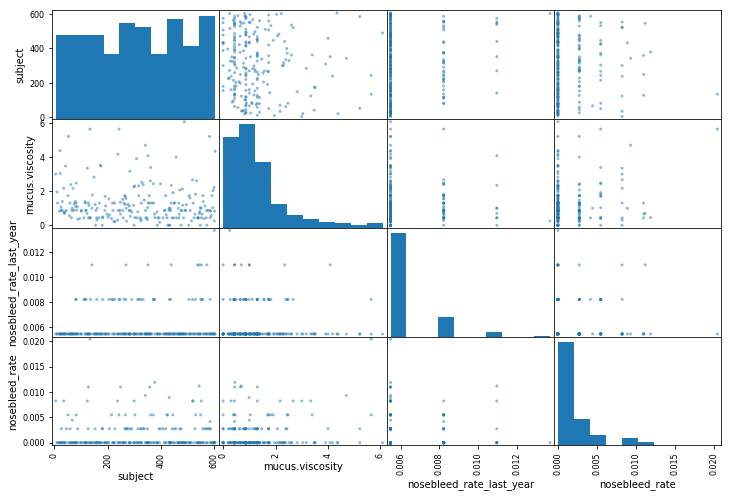

In [286]:
# Placebo dataframe scatter matrix to check out distributions

scatter_matrix(dfplacebo, figsize=(12,8))

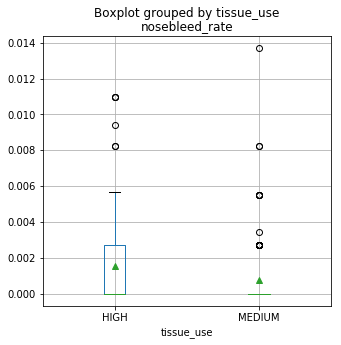

In [391]:
# Relationship between tissue usage and nose bleed rate for Active cases

fig, ax = plt.subplots(figsize=(5,  5))
dfactive.boxplot(['nosebleed_rate'], 'tissue.use', ax, showmeans=True)

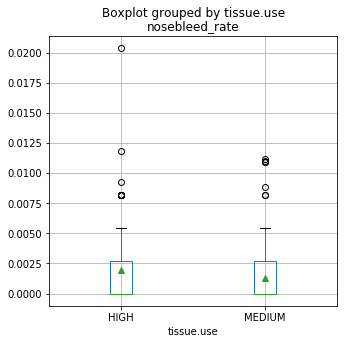

In [288]:
# Relationship between tissue usage and nose bleed rate for Placebo cases

fig, ax = plt.subplots(figsize=(5,  5))
dfplacebo.boxplot(['nosebleed_rate'], 'tissue.use', ax, showmeans=True)

# t-testing and Regression Analysis - Analysis of Significance #

In [289]:
import researchpy as rp
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp

In [290]:
df = pd.concat([dfactive, dfplacebo], ignore_index=True)

In [291]:
rp.summary_cont(df['nosebleed_rate'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,nosebleed_rate,444.0,0.001324,0.002688,0.000128,0.001074,0.001575


In [292]:
rp.summary_cont(df.groupby(['arm']))['nosebleed_rate']

,N,Mean,SD,SE,95% Conf.,Interval
arm,,,,,,
ACTIVE,223,0.001093,0.002374,0.000159,0.000781,0.001404
PLACEBO,221,0.001558,0.002958,0.000199,0.001168,0.001948


In [293]:
rp.summary_cont(df.groupby(['country']))['nosebleed_rate']

,N,Mean,SD,SE,95% Conf.,Interval
country,,,,,,
A,50,0.002236,0.003677,0.000520,0.001217,0.003255
B,72,0.001044,0.002816,0.000332,0.000394,0.001695
C,7,0.001174,0.002156,0.000815,-0.000423,0.002771
D,48,0.000571,0.001380,0.000199,0.000181,0.000961
E,47,0.002216,0.003368,0.000491,0.001253,0.003178
F,44,0.002721,0.003591,0.000541,0.001660,0.003782
G,36,0.001294,0.002220,0.000370,0.000569,0.002019
H,85,0.000423,0.001167,0.000127,0.000175,0.000671
I,22,0.001370,0.002772,0.000591,0.000211,0.002528


In [200]:
# t-tests for all cases

from scipy import stats
stats.ttest_rel(dfactive['nosebleed_rate'], dfactive['nosebleed_rate_last_year'])

Ttest_relResult(statistic=-32.981334476550735, pvalue=1.6024984173805874e-87)

In [201]:
stats.ttest_rel(dfplacebo['nosebleed_rate'], dfplacebo['nosebleed_rate_last_year'])

Ttest_relResult(statistic=-20.93842583525175, pvalue=2.811237699916666e-54)

In [202]:
stats.wilcoxon(dfactive['nosebleed_rate'], dfactive['nosebleed_rate_last_year'])

WilcoxonResult(statistic=335.5, pvalue=1.4561503765014356e-37)

In [203]:
stats.wilcoxon(dfplacebo['nosebleed_rate'], dfplacebo['nosebleed_rate_last_year'])

WilcoxonResult(statistic=956.0, pvalue=1.5679314016077132e-32)

In [204]:
stats.ttest_ind(dfactive['nosebleed_rate'], dfplacebo['nosebleed_rate'])   

Ttest_indResult(statistic=-1.8269466580995188, pvalue=0.06838200089479474)

In [205]:
stats.ttest_ind(dfactive['nosebleed_rate_last_year'], dfplacebo['nosebleed_rate_last_year'])   

Ttest_indResult(statistic=1.432207042741614, pvalue=0.1527913736645397)

In [213]:
# Replacing the NaN element in mucus viscosity with mean of active population

dfactive.fillna(dfactive.mean(),inplace=True)
dfactive.isna().sum()

subject                      0
arm                          0
country                      0
eye.colour                  25
tissue.use                   0
mucus.viscosity              0
nosebleed_rate_last_year     0
nosebleed_rate               0
dtype: int64

In [214]:
stats.ttest_ind(dfactive['mucus.viscosity'], dfplacebo['mucus.viscosity'])

Ttest_indResult(statistic=1.1788055917208609, pvalue=0.23910977902619998)

In [294]:
dfactive.rename(columns={'mucus.viscosity': 'mucus_viscosity', 'tissue.use': 'tissue_use', 'eye.colour': 'eye_colour'}, inplace=True)
dfplacebo.rename(columns={'mucus.viscosity': 'mucus_viscosity', 'tissue.use': 'tissue_use', 'eye.colour': 'eye_colour'}, inplace=True)
df.rename(columns={'mucus.viscosity': 'mucus_viscosity', 'tissue.use': 'tissue_use', 'eye.colour': 'eye_colour'}, inplace=True)

In [295]:
dfactive.head()

,subject,arm,country,eye_colour,tissue_use,mucus_viscosity,nosebleed_rate_last_year,nosebleed_rate
3,271,ACTIVE,A,BLUE,HIGH,0.869565,0.008219,0.000000
4,442,ACTIVE,A,BLUE,HIGH,1.304348,0.005479,0.000000
7,564,ACTIVE,A,NaN,MEDIUM,1.304348,0.008219,0.008242
9,369,ACTIVE,A,BLUE,MEDIUM,0.434783,0.005479,0.000000
10,509,ACTIVE,A,BLACK,HIGH,0.869565,0.005479,0.000000


In [173]:
dfactive.isna().sum()

subject                      0
arm                          0
country                      0
eye_colour                  25
tissue_use                   0
mucus_viscosity              1
nosebleed_rate_last_year     0
nosebleed_rate               0
dtype: int64

In [174]:
dfplacebo.isna().sum()

subject                      0
arm                          0
country                      0
eye_colour                  35
tissue_use                   0
mucus_viscosity              0
nosebleed_rate_last_year     0
nosebleed_rate               0
dtype: int64

In [296]:
dforiginal = df

dforiginal['nosebleed'] = dforiginal.apply(lambda row: (row['nosebleed_rate']/row['nosebleed_rate_last_year']), axis=1)
dforiginal.drop(['nosebleed_rate', 'nosebleed_rate_last_year'], axis=1, inplace=True)


In [257]:
# Regression models

model = ols('nosebleed_rate ~ arm+mucus_viscosity+tissue_use+country', df).fit()

In [258]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         nosebleed_rate   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     4.114
Date:                Sun, 05 May 2019   Prob (F-statistic):           4.18e-06
Time:                        20:16:39   Log-Likelihood:                 2017.7
No. Observations:                 443   AIC:                            -4009.
Df Residuals:                     430   BIC:                            -3956.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0022      0.000      5.142      0.000       0.001       0.003
arm[T.PLACEBO]           0.0005      0.000      1.916      0.056   -1.23e-05       0.001
tissue_use[T.MEDIUM]    -0.0006      0.000     -2.169      0.031      -0.001   -5.22e-05
country[T.B]            -0.0011      0.000     -2.223      0.027      -0.002      -0.000
country[T.C]            -0.0011      0.001     -1.051      0.294      -0.003       0.001
country[T.D]            -0.0017      0.001     -3.200      0.001      -0.003      -0.001
country[T.E]          -3.99e-05      0.001     -0.076      0.940      -0.001       0.001
country[T.F]             0.0005      0.001      0.945      0.345      -0.001       0.002
country[T.G]            -0.0009      0.001     -1.606      0.109      -0.002       0.000
country[T.H]            -0.0017      0.000     -3.693      0.000      -0.003      -0.001
country[T.I]            -0.0008      0.001     -1.226      0.221      -0.002       0.000
country[T.J]            -0.0012      0.001     -1.961      0.051      -0.002    2.86e-06
mucus_viscosity       1.391e-06      0.000      0.013      0.990      -0.000       0.000
==============================================================================
Omnibus:                      252.324   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1889.240
Skew:                           2.401   Prob(JB):                         0.00
Kurtosis:                      11.904   Cond. No.                         21.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [259]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df[['nosebleed_rate_last_year','nosebleed_rate']] = sc.fit_transform(df[['nosebleed_rate_last_year','nosebleed_rate']])

In [260]:
df.head()

,subject,arm,country,eye_colour,tissue_use,mucus_viscosity,nosebleed_rate_last_year,nosebleed_rate
0,271,ACTIVE,A,BLUE,HIGH,0.869565,1.254106,-0.493228
1,442,ACTIVE,A,BLUE,HIGH,1.304348,-0.475158,-0.493228
2,564,ACTIVE,A,NaN,MEDIUM,1.304348,1.254106,2.576517
3,369,ACTIVE,A,BLUE,MEDIUM,0.434783,-0.475158,-0.493228
4,509,ACTIVE,A,BLACK,HIGH,0.869565,-0.475158,-0.493228


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000210621B3780>,
      dtype=object)

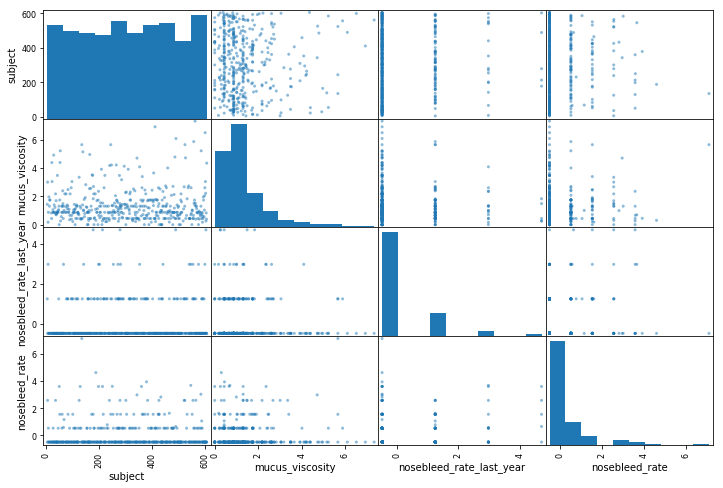

In [261]:
scatter_matrix(df, figsize=(12,8))

In [262]:
model = ols('nosebleed_rate ~ arm+mucus_viscosity+tissue_use+country', df).fit()

In [263]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         nosebleed_rate   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     4.114
Date:                Sun, 05 May 2019   Prob (F-statistic):           4.18e-06
Time:                        20:16:51   Log-Likelihood:                -604.89
No. Observations:                 443   AIC:                             1236.
Df Residuals:                     430   BIC:                             1289.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.3444      0.163      2.114      0.035       0.024       0.665
arm[T.PLACEBO]           0.1765      0.092      1.916      0.056      -0.005       0.358
tissue_use[T.MEDIUM]    -0.2073      0.096     -2.169      0.031      -0.395      -0.019
country[T.B]            -0.3960      0.178     -2.223      0.027      -0.746      -0.046
country[T.C]            -0.4086      0.389     -1.051      0.294      -1.173       0.355
country[T.D]            -0.6246      0.195     -3.200      0.001      -1.008      -0.241
country[T.E]            -0.0149      0.196     -0.076      0.940      -0.400       0.370
country[T.F]             0.1914      0.203      0.945      0.345      -0.207       0.590
country[T.G]            -0.3395      0.211     -1.606      0.109      -0.755       0.076
country[T.H]            -0.6363      0.172     -3.693      0.000      -0.975      -0.298
country[T.I]            -0.3050      0.249     -1.226      0.221      -0.794       0.184
country[T.J]            -0.4301      0.219     -1.961      0.051      -0.861       0.001
mucus_viscosity          0.0005      0.040      0.013      0.990      -0.077       0.078
==============================================================================
Omnibus:                      252.324   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1889.240
Skew:                           2.401   Prob(JB):                         0.00
Kurtosis:                      11.904   Cond. No.                         21.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [264]:
sc = StandardScaler()
dfactive[['nosebleed_rate_last_year','nosebleed_rate']] = sc.fit_transform(dfactive[['nosebleed_rate_last_year','nosebleed_rate']])

In [265]:
sc = StandardScaler()
dfplacebo[['nosebleed_rate_last_year','nosebleed_rate']] = sc.fit_transform(dfplacebo[['nosebleed_rate_last_year','nosebleed_rate']])

In [266]:
model = ols('nosebleed_rate ~ mucus_viscosity+tissue_use+country', dfactive).fit()

In [267]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         nosebleed_rate   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     4.942
Date:                Sun, 05 May 2019   Prob (F-statistic):           8.16e-07
Time:                        20:16:58   Log-Likelihood:                -289.84
No. Observations:                 222   AIC:                             603.7
Df Residuals:                     210   BIC:                             644.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.4906      0.223      2.199      0.029       0.051       0.930
tissue_use[T.MEDIUM]    -0.3014      0.129     -2.337      0.020      -0.556      -0.047
country[T.B]            -0.3281      0.254     -1.291      0.198      -0.829       0.173
country[T.C]            -0.6834      0.680     -1.005      0.316      -2.023       0.656
country[T.D]            -0.4856      0.270     -1.797      0.074      -1.018       0.047
country[T.E]             0.5468      0.277      1.972      0.050       0.000       1.093
country[T.F]             0.6083      0.274      2.222      0.027       0.069       1.148
country[T.G]            -0.1079      0.306     -0.352      0.725      -0.712       0.496
country[T.H]            -0.4159      0.245     -1.698      0.091      -0.899       0.067
country[T.I]            -0.3328      0.337     -0.986      0.325      -0.998       0.332
country[T.J]            -0.2163      0.300     -0.721      0.471      -0.807       0.375
mucus_viscosity         -0.1507      0.052     -2.918      0.004      -0.253      -0.049
==============================================================================
Omnibus:                       99.652   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              363.108
Skew:                           1.878   Prob(JB):                     1.42e-79
Kurtosis:                       8.014   Cond. No.                         25.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [268]:
model = ols('nosebleed_rate ~ mucus_viscosity+tissue_use+country', dfplacebo).fit()

In [269]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         nosebleed_rate   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     2.310
Date:                Sun, 05 May 2019   Prob (F-statistic):             0.0108
Time:                        20:17:02   Log-Likelihood:                -300.91
No. Observations:                 221   AIC:                             625.8
Df Residuals:                     209   BIC:                             666.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.3460      0.206      1.680      0.094      -0.060       0.752
tissue_use[T.MEDIUM]    -0.1534      0.139     -1.102      0.272      -0.428       0.121
country[T.B]            -0.4325      0.243     -1.782      0.076      -0.911       0.046
country[T.C]            -0.4529      0.472     -0.960      0.338      -1.383       0.477
country[T.D]            -0.6981      0.275     -2.538      0.012      -1.240      -0.156
country[T.E]            -0.4112      0.269     -1.529      0.128      -0.941       0.119
country[T.F]            -0.0587      0.298     -0.197      0.844      -0.646       0.529
country[T.G]            -0.4925      0.284     -1.731      0.085      -1.053       0.068
country[T.H]            -0.7953      0.236     -3.375      0.001      -1.260      -0.331
country[T.I]            -0.1865      0.361     -0.517      0.606      -0.897       0.524
country[T.J]            -0.5727      0.314     -1.825      0.069      -1.191       0.046
mucus_viscosity          0.1425      0.059      2.406      0.017       0.026       0.259
==============================================================================
Omnibus:                      116.649   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              567.534
Skew:                           2.122   Prob(JB):                    5.78e-124
Kurtosis:                       9.605   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [297]:
dforiginal.head()

,subject,arm,country,eye_colour,tissue_use,mucus_viscosity,nosebleed
0,271,ACTIVE,A,BLUE,HIGH,0.869565,0.000000
1,442,ACTIVE,A,BLUE,HIGH,1.304348,0.000000
2,564,ACTIVE,A,NaN,MEDIUM,1.304348,1.002747
3,369,ACTIVE,A,BLUE,MEDIUM,0.434783,0.000000
4,509,ACTIVE,A,BLACK,HIGH,0.869565,0.000000


In [308]:
dforiginal.describe()

,subject,mucus_viscosity,nosebleed
count,444.000000,443.000000,444.000000
mean,307.583333,1.356150,0.209851
std,174.495376,1.205410,0.441703
min,4.000000,0.000000,0.000000
25%,157.750000,0.613043,0.000000
50%,306.500000,1.000000,0.000000
75%,455.250000,1.695652,0.333333
max,605.000000,7.317391,3.724490


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021065FCBBE0>,
      dtype=object)

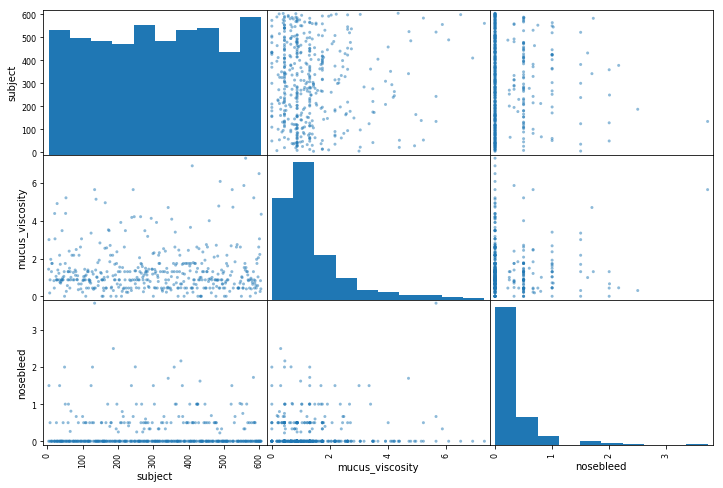

In [298]:
scatter_matrix(dforiginal, figsize=(12,8))

In [301]:
dfactive_original = dforiginal[dforiginal.arm == 'ACTIVE']
dfactive_original.head()

,subject,arm,country,eye_colour,tissue_use,mucus_viscosity,nosebleed
0,271,ACTIVE,A,BLUE,HIGH,0.869565,0.000000
1,442,ACTIVE,A,BLUE,HIGH,1.304348,0.000000
2,564,ACTIVE,A,NaN,MEDIUM,1.304348,1.002747
3,369,ACTIVE,A,BLUE,MEDIUM,0.434783,0.000000
4,509,ACTIVE,A,BLACK,HIGH,0.869565,0.000000


In [302]:
model = ols('nosebleed ~ mucus_viscosity+tissue_use+country', dfactive_original).fit()

In [303]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              nosebleed   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     4.042
Date:                Sun, 05 May 2019   Prob (F-statistic):           2.25e-05
Time:                        20:44:48   Log-Likelihood:                -64.752
No. Observations:                 222   AIC:                             153.5
Df Residuals:                     210   BIC:                             194.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.2987      0.081      3.690      0.000       0.139       0.458
tissue_use[T.MEDIUM]    -0.0915      0.047     -1.956      0.052      -0.184       0.001
country[T.B]            -0.0677      0.092     -0.734      0.464      -0.249       0.114
country[T.C]            -0.2093      0.247     -0.849      0.397      -0.695       0.277
country[T.D]            -0.1262      0.098     -1.287      0.199      -0.319       0.067
country[T.E]             0.1929      0.101      1.918      0.057      -0.005       0.391
country[T.F]             0.2419      0.099      2.436      0.016       0.046       0.438
country[T.G]            -0.0214      0.111     -0.192      0.848      -0.240       0.198
country[T.H]            -0.1130      0.089     -1.272      0.205      -0.288       0.062
country[T.I]            -0.0641      0.122     -0.524      0.601      -0.305       0.177
country[T.J]            -0.0525      0.109     -0.483      0.630      -0.267       0.162
mucus_viscosity         -0.0558      0.019     -2.980      0.003      -0.093      -0.019
==============================================================================
Omnibus:                      144.961   Durbin-Watson:                   2.140
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1155.977
Skew:                           2.524   Prob(JB):                    9.61e-252
Kurtosis:                      12.975   Cond. No.                         25.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [304]:
dfplacebo_original = dforiginal[dforiginal.arm == 'PLACEBO']
dfplacebo_original.head()

,subject,arm,country,eye_colour,tissue_use,mucus_viscosity,nosebleed
223,359,PLACEBO,A,BLUE,MEDIUM,1.304348,2.000000
224,241,PLACEBO,A,BLUE,HIGH,0.869565,0.000000
225,409,PLACEBO,A,BLUE,MEDIUM,0.434783,0.500000
226,249,PLACEBO,A,BLACK,MEDIUM,0.660870,2.005495
227,284,PLACEBO,A,BLUE,HIGH,3.173913,0.000000


In [305]:
model = ols('nosebleed ~ mucus_viscosity+tissue_use+country', dfactive_original).fit()

In [306]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              nosebleed   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     4.042
Date:                Sun, 05 May 2019   Prob (F-statistic):           2.25e-05
Time:                        20:47:05   Log-Likelihood:                -64.752
No. Observations:                 222   AIC:                             153.5
Df Residuals:                     210   BIC:                             194.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.2987      0.081      3.690      0.000       0.139       0.458
tissue_use[T.MEDIUM]    -0.0915      0.047     -1.956      0.052      -0.184       0.001
country[T.B]            -0.0677      0.092     -0.734      0.464      -0.249       0.114
country[T.C]            -0.2093      0.247     -0.849      0.397      -0.695       0.277
country[T.D]            -0.1262      0.098     -1.287      0.199      -0.319       0.067
country[T.E]             0.1929      0.101      1.918      0.057      -0.005       0.391
country[T.F]             0.2419      0.099      2.436      0.016       0.046       0.438
country[T.G]            -0.0214      0.111     -0.192      0.848      -0.240       0.198
country[T.H]            -0.1130      0.089     -1.272      0.205      -0.288       0.062
country[T.I]            -0.0641      0.122     -0.524      0.601      -0.305       0.177
country[T.J]            -0.0525      0.109     -0.483      0.630      -0.267       0.162
mucus_viscosity         -0.0558      0.019     -2.980      0.003      -0.093      -0.019
==============================================================================
Omnibus:                      144.961   Durbin-Watson:                   2.140
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1155.977
Skew:                           2.524   Prob(JB):                    9.61e-252
Kurtosis:                      12.975   Cond. No.                         25.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [307]:
stats.ttest_ind(dfactive_original['nosebleed'], dfplacebo_original['nosebleed'])   

Ttest_indResult(statistic=-2.4512853291424728, pvalue=0.014620911304043645)

In [369]:
dfactive_original['mucus_viscosity_categ'] = pd.cut(dfactive_original.mucus_viscosity,
                     bins=[0, 0.51, 0.81, 1.01, 1.51, 2.01, 3.01, 8.01],
                     labels=["a", "b", "c", "d", "e", "f", "g"])

C:\Users\roohi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [370]:
dfactive_original.head()

,subject,arm,country,eye_colour,tissue_use,mucus_viscosity,nosebleed,mucus_viscosity_categ
0,271,ACTIVE,A,BLUE,HIGH,0.869565,0.000000,c
1,442,ACTIVE,A,BLUE,HIGH,1.304348,0.000000,d
2,564,ACTIVE,A,NaN,MEDIUM,1.304348,1.002747,d
3,369,ACTIVE,A,BLUE,MEDIUM,0.434783,0.000000,a
4,509,ACTIVE,A,BLACK,HIGH,0.869565,0.000000,c


In [371]:
dfactive_original.groupby('mucus_viscosity_categ').size()

mucus_viscosity_categ
a    37
b    21
c    42
d    49
e    23
f    22
g    20
dtype: int64

In [372]:
model = ols('nosebleed ~ mucus_viscosity_categ+tissue_use+country', dfactive_original).fit()

In [373]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              nosebleed   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     2.720
Date:                Sun, 05 May 2019   Prob (F-statistic):           0.000618
Time:                        23:01:28   Log-Likelihood:                -50.627
No. Observations:                 214   AIC:                             135.3
Df Residuals:                     197   BIC:                             192.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.3359      0.092      3.645      0.000       0.154       0.518
mucus_viscosity_categ[T.b]    -0.1388      0.090     -1.551      0.123      -0.315       0.038
mucus_viscosity_categ[T.c]    -0.1554      0.074     -2.089      0.038      -0.302      -0.009
mucus_viscosity_categ[T.d]    -0.0794      0.071     -1.116      0.266      -0.220       0.061
mucus_viscosity_categ[T.e]    -0.0453      0.087     -0.522      0.602      -0.216       0.126
mucus_viscosity_categ[T.f]    -0.1785      0.090     -1.974      0.050      -0.357      -0.000
mucus_viscosity_categ[T.g]    -0.2894      0.092     -3.154      0.002      -0.470      -0.108
tissue_use[T.MEDIUM]          -0.0834      0.046     -1.806      0.072      -0.174       0.008
country[T.B]                  -0.0802      0.091     -0.880      0.380      -0.260       0.100
country[T.C]                  -0.2545      0.238     -1.069      0.286      -0.724       0.215
country[T.D]                  -0.1278      0.095     -1.339      0.182      -0.316       0.060
country[T.E]                   0.0977      0.099      0.989      0.324      -0.097       0.293
country[T.F]                   0.2149      0.096      2.244      0.026       0.026       0.404
country[T.G]                  -0.0295      0.109     -0.271      0.787      -0.244       0.185
country[T.H]                  -0.1173      0.088     -1.330      0.185      -0.291       0.057
country[T.I]                  -0.0824      0.121     -0.679      0.498      -0.322       0.157
country[T.J]                  -0.0379      0.109     -0.347      0.729      -0.253       0.178
==============================================================================
Omnibus:                      140.979   Durbin-Watson:                   2.208
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1192.501
Skew:                           2.502   Prob(JB):                    1.13e-259
Kurtosis:                      13.426   Cond. No.                         15.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021066734F28>]],
      dtype=object)

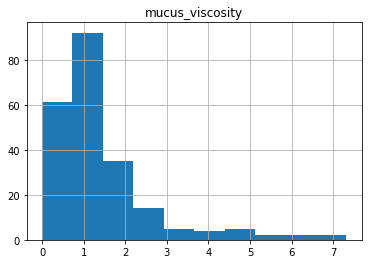

In [368]:
dfactive_original[['mucus_viscosity']].hist()

In [382]:
dfactive_original_resampled = dfactive_original[dfactive_original.mucus_viscosity > 2.00]

In [383]:
dfactive_original_resampled.head()

,subject,arm,country,eye_colour,tissue_use,mucus_viscosity,nosebleed,mucus_viscosity_categ
7,294,ACTIVE,B,BLUE,MEDIUM,4.130435,0.0,g
12,168,ACTIVE,D,BLUE,HIGH,2.565217,0.0,f
15,178,ACTIVE,D,BLUE,HIGH,2.695652,0.0,f
20,52,ACTIVE,D,BLUE,HIGH,4.391304,0.0,g
32,197,ACTIVE,F,BLUE,HIGH,2.356522,1.0,f


In [388]:
model = ols('nosebleed ~ mucus_viscosity+tissue_use+country', dfactive_original_resampled).fit()

In [389]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              nosebleed   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1.269
Date:                Sun, 05 May 2019   Prob (F-statistic):              0.291
Time:                        23:57:40   Log-Likelihood:                 17.049
No. Observations:                  42   AIC:                            -14.10
Df Residuals:                      32   BIC:                             3.278
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.1258      0.144      0.873      0.389      -0.168       0.420
tissue_use[T.MEDIUM]    -0.1407      0.077     -1.825      0.077      -0.298       0.016
country[T.B]             0.1609      0.180      0.896      0.377      -0.205       0.527
country[T.D]             0.0663      0.157      0.422      0.676      -0.254       0.386
country[T.F]             0.2806      0.154      1.824      0.077      -0.033       0.594
country[T.G]             0.2003      0.168      1.193      0.242      -0.142       0.542
country[T.H]             0.1532      0.162      0.944      0.352      -0.177       0.484
country[T.I]             0.0427      0.152      0.281      0.780      -0.267       0.352
country[T.J]             0.2975      0.179      1.658      0.107      -0.068       0.663
mucus_viscosity         -0.0488      0.024     -2.059      0.048      -0.097      -0.001
==============================================================================
Omnibus:                       37.789   Durbin-Watson:                   2.417
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.227
Skew:                           2.215   Prob(JB):                     2.88e-27
Kurtosis:                      10.087   Cond. No.                         54.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""